In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python for NLP (Udemy)/Projects/3. Disneyland Reviews/DisneylandReviews.csv',encoding='latin-1') # encoding is important here because it will set excel file clearly.

In [ ]:
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
print('Number of rows: {}'.format(data.shape[0]))

Number of rows: 42656


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [ ]:
data['Rating'].value_counts().sort_values()
# data['Rating'].value_counts(ascending = True)
# both generates same output

1     1499
2     2127
3     5109
4    10775
5    23146
Name: Rating, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

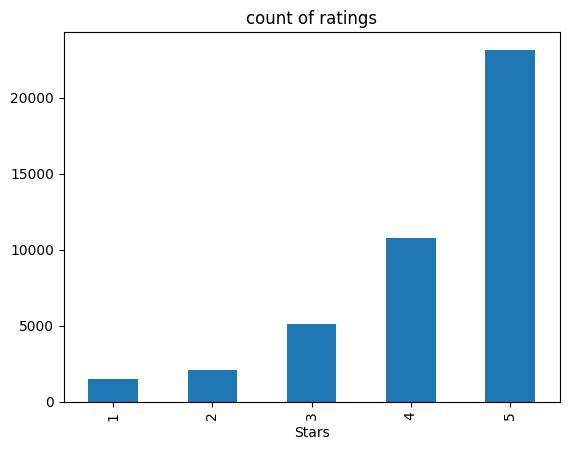

In [ ]:
data['Rating'].value_counts(ascending=True).plot(kind  = 'bar',title = 'count of ratings', xlabel = 'Stars')
plt.show()

In [ ]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Branch'>

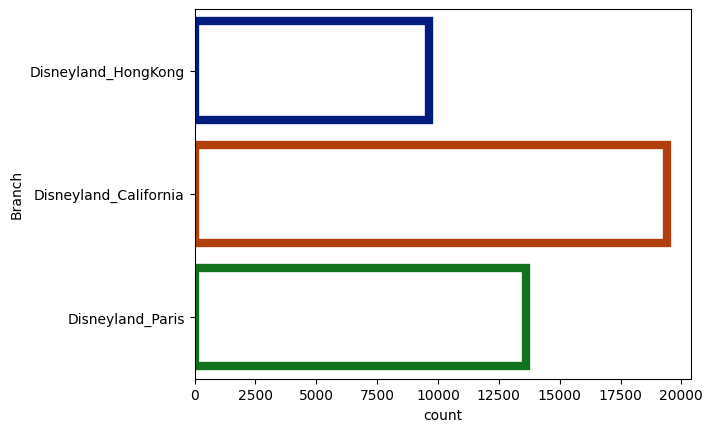

In [ ]:
sns.countplot(y = 'Branch',data = data, facecolor = (1,1,1,1), linewidth = 6, edgecolor = sns.color_palette('dark',4))

In [ ]:
data['Branch'].unique()

array(['Disneyland_HongKong', 'Disneyland_California', 'Disneyland_Paris'],
      dtype=object)

In [ ]:
data['Branch'].value_counts()

Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: Branch, dtype: int64

<Axes: xlabel='Rating', ylabel='Branch'>

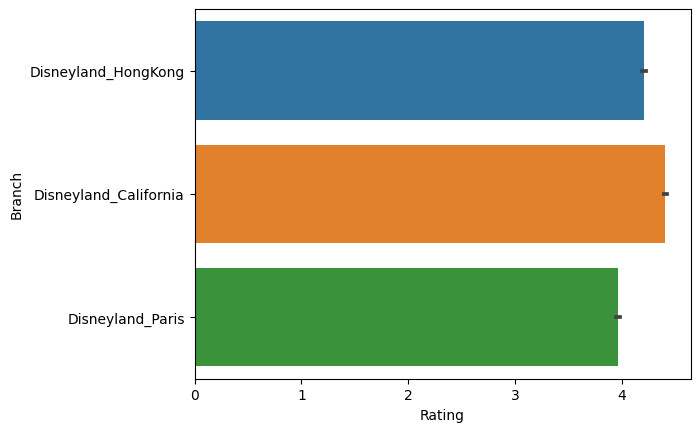

In [ ]:
sns.barplot(y = data['Branch'],x = data['Rating'])

drop unneccessay columns

In [ ]:
data.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [ ]:
data.drop(data.columns[[0,2,3,5]],axis = 1, inplace = True)

In [ ]:
data.head()

,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."


**Data Analysis Part-2**

In [ ]:
data = data[["Review_Text","Rating"]]

In [ ]:
data

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4
...,...,...
42651,i went to disneyland paris in july 03 and thou...,5
42652,2 adults and 1 child of 11 visited Disneyland ...,5
42653,My eleven year old daughter and myself went to...,5
42654,"This hotel, part of the Disneyland Paris compl...",4


In [ ]:
data.isnull().sum()

Review_Text    0
Rating         0
dtype: int64

In [ ]:
data.duplicated().sum()

23

In [ ]:
data.drop_duplicates(inplace = True)

<ipython-input-39-71ccd570b950>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace = True)


In [ ]:
data.duplicated().sum()

0

In [ ]:
empty = []
for i in data['Review_Text']:
  if i.isspace() == True:
    empty.append(i)

In [ ]:
print(empty)

[]


In [ ]:
def rating(rating):
  if rating > 2 and rating <= 5:
    return "Positive"
  if rating > 0 and rating <= 2:
    return "Negative"

In [ ]:
data['pos/neg'] = data['Rating'].apply(rating)

<ipython-input-45-21272c2a3db3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pos/neg'] = data['Rating'].apply(rating)


In [ ]:
data.head()

,Review_Text,Rating,pos/neg
0,If you've ever been to Disneyland anywhere you...,4,Positive
1,Its been a while since d last time we visit HK...,4,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive
4,"the location is not in the city, took around 1...",4,Positive


In [ ]:
data['pos/neg'].value_counts()

Positive    39009
Negative     3624
Name: pos/neg, dtype: int64

# **Sentiment analysis**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentanalyze = SentimentIntensityAnalyzer()

In [ ]:
review = 'This is a nice day. Weather is very good'

In [ ]:
sentanalyze.polarity_scores(review)

{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.7178}

In [ ]:
data['Score'] = data['Review_Text'].apply(lambda review: sentanalyze.polarity_scores(review))

In [ ]:
data.head()

,Review_Text,Rating,pos/neg,Score
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
4,"the location is not in the city, took around 1...",4,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."


In [ ]:
data['Compound'] = data['Score'].apply(lambda f:f['compound'])

In [ ]:
data.head()

,Review_Text,Rating,pos/neg,Score,Compound
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489
4,"the location is not in the city, took around 1...",4,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846


In [ ]:
data['compound_pn'] = data['Compound'].apply(lambda score:"Positive" if score>=0 else "Negative")

In [ ]:
data.head()

,Review_Text,Rating,pos/neg,Score,Compound,compound_pn
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,Positive
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,Positive
4,"the location is not in the city, took around 1...",4,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,Positive


In [ ]:
eg = 'Weather is bad, I don\'t like this day'

In [ ]:
sentanalyze.polarity_scores(eg)

{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'compound': -0.6818}

# **text classfication**

In [68]:
data.head()

,Review_Text,Rating,pos/neg,Score,Compound,compound_pn
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,Positive
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,Positive
4,"the location is not in the city, took around 1...",4,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,Positive


In [69]:
data = data[['Review_Text','Rating','pos/neg']]

In [70]:
data.head()

,Review_Text,Rating,pos/neg
0,If you've ever been to Disneyland anywhere you...,4,Positive
1,Its been a while since d last time we visit HK...,4,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive
4,"the location is not in the city, took around 1...",4,Positive


In [77]:
x = data['Review_Text']
y = data['pos/neg']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)

In [85]:
# len(x_train)

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
textclf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [92]:
textclf.fit(x_train,y_train) # we fitted our model in data

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [94]:
preds = textclf.predict(x_test)

In [95]:
print(accuracy_score(preds,y_test))

0.9361717250693014


In [96]:
cm = confusion_matrix(y_test,preds)

In [97]:
print(cm)

[[  548   631]
 [  267 12623]]


In [110]:
import matplotlib
matplotlib.rc('figure',figsize = (10,5))

In [111]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False,True])

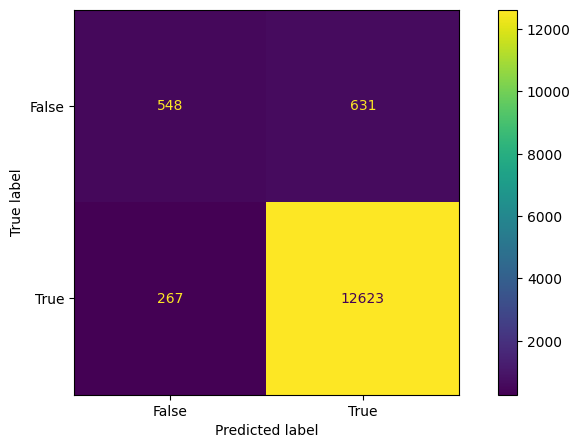

In [112]:
cm_display.plot()
plt.show()

In [113]:
newreview = [('Disneyland was perfect, I liked it so much')]

In [114]:
textclf.predict(newreview)

array(['Positive'], dtype=object)

In [115]:
textclf.predict(newreview)[0]

'Positive'